<a href="https://colab.research.google.com/github/JohanArizaMendez/Johan/blob/main/Tarea_3_Ariza_Johan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electromagnetismo 1 - Johan Stiven Ariza Mendez**

## **Tarea 3: Ecuación de Laplace - Método de Relajación**

El teorema del promedio satisfecho por funciones armónicas proporciona un método computacional para resolver la ecuación de Laplace conocido como método de relajación. El objetivo de esta tarea es implementar este método.

Considere la ecuación de Laplace para el potencial $V$:

$$ \nabla^2 V(\textbf{r}) = 0$$

en dos dimensiones con $\textbf{r} = \vec r(x,y)$ en una región rectangular $\mathcal{D}$ limitada por $0\leq x\leq a$ y $0\leq y \leq b$ con condiciones de frontera de Dirichlet $V(\textbf{r})=V_0(x,y)$ para $\textbf{r}\in\mathcal{\partial D}$ en donde $V_0$ es una función dada conocida sobre el borde del área rectangular. El dominio $\mathcal{D}$ puede ser particionado en una fina red de $N\times M$ sitios separados por $(dx,dy)$ en cada dirección.

$1.$ Encontrar la versión discreta del laplaciano desarrollando $V$ en serie de Taylor a segundo orden en $dx$ y $dy$:

Para encontrar una versión discreta del laplaciano en una red de $N \times M$ sitios con separación $(dx,dy)$, comenzamos expandiendo el potencial $V$ en una serie de Taylor a segundo orden en $dx$ y $dy$. La expansión de Taylor de $V$ alrededor de un punto $(x_0, y_0)$ es:

$$
V(x, y) = V(x_0, y_0) + \frac{\partial V}{\partial x}\bigg|_{(x_0, y_0)}(x - x_0) + \frac{\partial V}{\partial y}\bigg|_{(x_0, y_0)}(y - y_0) + \frac{1}{2}\frac{\partial^2 V}{\partial x^2}\bigg|_{(x_0, y_0)}(x - x_0)^2 + \frac{1}{2}\frac{\partial^2 V}{\partial y^2}\bigg|_{(x_0, y_0)}(y - y_0)^2 + \frac{\partial^2 V}{\partial x \partial y}\bigg|_{(x_0, y_0)}(x - x_0)(y - y_0) + \cdots$$

Para simplificar los cálculos, tomamos $x_0 = x - \frac{1}{2}dx
$ y $y_0 = y - \frac{1}{2}dy$ como puntos de referencia. Luego, podemos escribir la expansión de Taylor como:


\begin{aligned}
V(x, y) &= V\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right) \\
&\quad+ \frac{\partial V}{\partial x}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)}\left(dx - \frac{1}{2}dx\right) \\
&\quad+ \frac{\partial V}{\partial y}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)}\left(dy - \frac{1}{2}dy\right) \\
&\quad+ \frac{1}{2}\frac{\partial^2 V}{\partial x^2}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)}\left(dx - \frac{1}{2}dx\right)^2 \\
&\quad+ \frac{1}{2}\frac{\partial^2 V}{\partial y^2}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)}\left(dy - \frac{1}{2}dy\right)^2 \\
&\quad+ \frac{\partial^2 V}{\partial x \partial y}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)}\left(dx - \frac{1}{2}dx\right)\left(dy - \frac{1}{2}dy\right) + \cdots
\end{aligned}


Ahora, podemos aproximar los términos de derivadas parciales discretas usando diferencias finitas centradas. La aproximación de segundo orden para las derivadas parciales es:


\begin{aligned}
\frac{\partial V}{\partial x}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)} &\approx \frac{V(x, y) - V(x - dx, y)}{dx} \\
\frac{\partial V}{\partial y}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)} &\approx \frac{V(x, y) - V(x, y - dy)}{dy} \\
\frac{\partial^2 V}{\partial x^2}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)} &\approx \frac{V(x, y) - 2V(x - dx, y) + V(x - 2dx, y)}{dx^2} \\
\frac{\partial^2 V}{\partial y^2}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)} &\approx \frac{V(x, y) - 2V(x, y - dy) + V(x, y - 2dy)}{dy^2} \\
\frac{\partial^2 V}{\partial x \partial y}\bigg|_{\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right)} &\approx \frac{V(x - dx, y - dy) - V(x - dx, y) - V(x, y - dy) + V(x, y)}{dx \cdot dy}
\end{aligned}


Sustituyendo estas aproximaciones en la expansión de Taylor y manteniendo solo términos hasta segundo orden en  $dx$  y  $dy$, obtenemos:


\begin{aligned}
V(x, y) &\approx V\left(x - \frac{1}{2}dx, y - \frac{1}{2}dy\right) \\
&\quad+ \frac{V(x, y) - V(x - dx, y)}{dx}\left(dx - \frac{1}{2}dx\right) \\
&\quad+ \frac{V(x, y) - V(x, y - dy)}{dy}\left(dy - \frac{1}{2}dy\right) \\
&\quad+ \frac{1}{2}\frac{V(x, y) - 2V(x - dx, y) + V(x - 2dx, y)}{dx^2}\left(dx - \frac{1}{2}dx\right)^2 \\
&\quad+ \frac{1}{2}\frac{V(x, y) - 2V(x, y - dy) + V(x, y - 2dy)}{dy^2}\left(dy - \frac{1}{2}dy\right)^2 \\
&\quad+ \frac{V(x - dx, y - dy) - V(x - dx, y) - V(x, y - dy) + V(x, y)}{dx \cdot dy}\left(dx - \frac{1}{2}dx\right)\left(dy - \frac{1}{2}dy\right)
\end{aligned}

Luego, simplificamos esta expresión y despejamos $V(x,y)$ para obtener una forma discreta de la ecuación de Laplace. Al hacerlo, obtenemos la versión discreta del Laplaciano:

$$
\nabla^2 V(\textbf{r}) \approx \frac{ V(x+dx,y) + V(x-dx,y) - 2V(x,y)}{dx^{2}} + \frac{ V(x,y+dy) + V(x,y-dy) - 2V(x,y)}{dy^{2}}
$$
$2.$ Mostrar que si el Laplaciano es nulo, entonces $V(x,y)$ es igual al promedio de los valores de sus cuatro ubicaciones vecinas en la red.

Para demostrar que si el Laplaciano de $V$ es nulo, entonces $V(x,y)$ es igual al promedio de los valores de sus cuatro ubicaciones vecinas en la red, comenzaremos con la expresión discreta del Laplaciano:

$$
\nabla^2 V(\textbf{r}) = \frac{ V(x+dx,y) + V(x-dx,y) - 2V(x,y)}{dx^{2}} + \frac{ V(x,y+dy) + V(x,y-dy) - 2V(x,y)}{dy^{2}} = 0$$

Vamos a simplificar esta expresión asumiendo que $dx = \Delta x = dy = \Delta y = \Delta$. Esto nos lleva a:

$$
\frac{ V(x+\Delta,y) + V(x-\Delta,y) - 2V(x,y)}{\Delta^{2}} + \frac{ V(x,y+\Delta) + V(x,y-\Delta) - 2V(x,y)}{\Delta^{2}} = 0
$$

Ahora, si reorganizamos términos, obtenemos:

$$
V(x+\Delta,y) + V(x-\Delta,y) + V(x,y+\Delta) + V(x,y-\Delta) - 4V(x,y) = 0
$$

Para expresar $V(x,y)$ en términos del promedio de sus ubicaciones vecinas, dividiremos ambos lados de la ecuación por $4$:

$$
\frac{1}{4}(V(x+\Delta,y) + V(x-\Delta,y) + V(x,y+\Delta) + V(x,y-\Delta)) = V(x,y)
$$

Esto implica que $V(x,y)$ es igual al promedio de sus ubicaciones vecinas en la red:

$$
V(x,y) = \frac{1}{4}(V(x+\Delta,y) + V(x-\Delta,y) + V(x,y+\Delta) + V(x,y-\Delta))
$$

Por lo tanto, hemos demostrado que si el Laplaciano de $V$ es nulo, entonces $V(x,y)$ es igual al promedio de los valores de sus cuatro ubicaciones vecinas en la red.

$3.$ Implementar un programa en python para resolver la ecuación de Laplace con las condiciones de frontera dadas basado en el siguiente algoritmo:

  1. Discretizar el plano $XY$ en una red de $N\times M$ ubicaciones separadas por $dx = dy = \Delta$ en cada dirección
  2. Se asignan valores arbitrarios a $V(x,y)$ en cada sitio interno de la red.
  3. En los bordes se asignan los valores impuestos por las condiciones de frontera $V_0(x,y)$ en cada sitio interno de la red.
  4. Luego para cada sitio interno de la red se actualiza el valor de $V(x,y)$ con el promedio de los valores en los sitios vecinos (De acuerdo con la ecuación de relajación hallada en el inciso anterior).
  5.  Iterar el proceso todas las veces que sea necesario hasta que los valores del potencial $V$ no cambien sensiblemente.
    
El programa debe aceptar como entrada el número de puntos de la red $N,M$, el paso $dx = dy = \Delta$, y los valores de las condiciones de frontera $V_0(x,y)$ en los bordes. El programa devuelve la solución de la ecuación de Laplace $V(x,y)$.


In [40]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

# **METODO DE RELAJACIÓN Y SUS GRAFICAS**

In [42]:
"""
Este programa calcula el potencial eléctrico en una región rectangular utilizando el método de relajación
y muestra gráficas en 3D y 2D del potencial eléctrico junto con las curvas de nivel correspondientes.
"""

def metodo_relajacion_potencial(a, b, paso, borde_derecho, borde_izquierdo, borde_superior, borde_inferior):
    """
    Calcula la solución a la ecuación de Laplace para un potencial eléctrico en dos dimensiones utilizando el método de relajación.

    Args:
        a (int): Cantidad de ubicaciones en una fila.
        b (int): Cantidad de ubicaciones en una columna.
        paso (float): Separación de las ubicaciones.
        borde_derecho (float): Condición de frontera del borde derecho.
        borde_izquierdo (float): Condición de frontera del borde izquierdo.
        borde_superior (float): Condición de frontera del borde superior.
        borde_inferior (float): Condición de frontera del borde inferior.

    Returns:
        np.ndarray: Array de numpy para el potencial eléctrico.
        np.ndarray: Array de coordenadas X.
        np.ndarray: Array de coordenadas Y.
    """
    # Definición de las coordenadas X e Y
    xmin, ymin = 0.0, 0.0
    xmax, ymax = a * paso, b * paso
    x_coords = np.linspace(xmin, xmax, a)
    y_coords = np.linspace(ymin, ymax, b)

    # Inicialización de la matriz del potencial eléctrico
    potencial = np.zeros((a, b))

    def inicializar_condiciones_frontera(v, derecho=0.0, izquierdo=0.0, arriba=0.0, abajo=0.0):
        """
        Inicializa las condiciones de frontera para la matriz de potencial.

        Args:
            v (np.ndarray): Array inicial de ceros para el potencial eléctrico.
            derecho (float): Condición de frontera del borde derecho.
            izquierdo (float): Condición de frontera del borde izquierdo.
            arriba (float): Condición de frontera del borde superior.
            abajo (float): Condición de frontera del borde inferior.

        Returns:
            np.ndarray: Array de potencial eléctrico con las condiciones de frontera de Dirichlet implementadas.

        Raises:
            TypeError: Si v no es un numpy array 2D.
        """
        if not isinstance(v, np.ndarray) or v.ndim != 2:
            raise TypeError("v debe ser un numpy array 2D")

        # Se definen los índices para las condiciones de frontera
        N = v.shape[0] - 1
        M = v.shape[1] - 1

        # Asignación de las condiciones de frontera
        v[:, 0] = izquierdo
        v[:, N] = derecho
        v[0, :] = arriba
        v[M, :] = abajo
        return v

    def relajacion(v: np.ndarray, tol: float = 0.00001):
        """
        Relaja la matriz hasta que la diferencia entre iteraciones sea menor a la tolerancia.

        Args:
            v (np.ndarray): Array 2D para el potencial con las condiciones de frontera.
            tol (float, optional): Valor de tolerancia que se compara con la diferencia entre iteraciones. Si la diferencia es menor, termina la relajación. Por defecto es 0.00001.

        Returns:
            np.ndarray: Array de numpy para el potencial eléctrico, con el método de relajación iterativamente implementado hasta alcanzar la solución.
        """
        v_temp = v.copy()
        N = v.shape[0] - 1
        M = v.shape[1] - 1

        # Iteraciones del método de relajación
        for r in range(10000):
            v = v_temp.copy()

            # Recorrido de la matriz para calcular el nuevo potencial
            for j in range(1, M):
                for i in range(1, N):
                    v_temp[i, j] = 0.25 * (v[i+1, j] + v[i-1, j] + v[i, j+1] + v[i, j-1])

            # Comprobación de la convergencia
            variacion = np.abs(v - v_temp)
            if np.max(variacion) < tol:
                print(f'Los valores no varian de significativamente desde la iteración #{r}')
                break

        return v

    # Inicialización de las condiciones de frontera
    potencial = inicializar_condiciones_frontera(potencial, borde_derecho, borde_izquierdo, borde_superior, borde_inferior)

    # Ejecución del método de relajación
    potencial = relajacion(potencial)

    return potencial, x_coords, y_coords

def generar_graficas_relajacion(potencial, x_coords, y_coords):
    """
    Genera las gráficas 3D y 2D del potencial eléctrico y las curvas de nivel correspondientes.

    Args:
        potencial (np.ndarray): Array de numpy para el potencial eléctrico.
        x_coords (np.ndarray): Array de coordenadas X.
        y_coords (np.ndarray): Array de coordenadas Y.
    """
    # Creación de mallas de coordenadas X e Y para graficar
    X, Y = np.meshgrid(x_coords, y_coords)

    # Gráfica del potencial eléctrico en 3D
    fig = plt.figure(figsize=(13, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_wireframe(X, Y, potencial, color='DarkBlue', label='Potencial eléctrico computado')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('V(X, Y)')
    ax1.set_title('Gráfico 3D del potencial eléctrico')

    # Ajuste de la perspectiva de la visualización para mover el eje z
    ax1.view_init(elev=20, azim=135)

    # Gráfica de las curvas de nivel
    ax2 = fig.add_subplot(122)
    ax2.contour(X, Y, potencial)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Gráfico 2D de las curvas de nivel del potencial eléctrico')

    # Ajuste de los márgenes para aumentar el espacio entre las subfiguras
    plt.subplots_adjust(wspace=0.5)

    plt.tight_layout()
    plt.show()




# **EJECUTAR PROGRAMA (TEST)**

Por favor, ingrese los siguientes datos:
Cantidad de ubicaciones en una fila (N): 100
Cantidad de ubicaciones en una columna (M): 100
Separación de las ubicaciones (paso): 0.002
Condición de frontera del borde derecho: 0
Condición de frontera del borde izquierdo: 0
Condición de frontera del borde superior: 1
Condición de frontera del borde inferior: -1
Los valores no varian de significativamente desde la iteración #3495


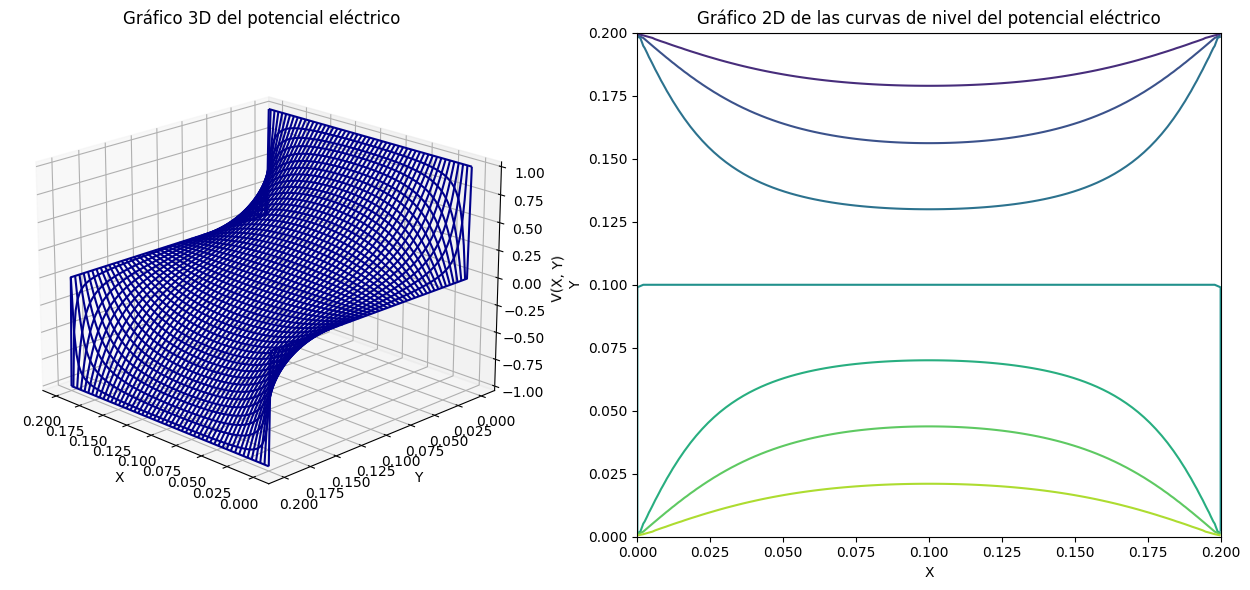

(array([[ 1.   ,  1.   ,  1.   , ...,  1.   ,  1.   ,  1.   ],
        [ 0.   ,  0.5  ,  0.697, ...,  0.697,  0.5  ,  0.   ],
        [ 0.   ,  0.302,  0.499, ...,  0.499,  0.302,  0.   ],
        ...,
        [ 0.   , -0.302, -0.499, ..., -0.499, -0.302,  0.   ],
        [ 0.   , -0.5  , -0.697, ..., -0.697, -0.5  ,  0.   ],
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]]),
 array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
        0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
        0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.051, 0.053,
        0.055, 0.057, 0.059, 0.061, 0.063, 0.065, 0.067, 0.069, 0.071,
        0.073, 0.075, 0.077, 0.079, 0.081, 0.083, 0.085, 0.087, 0.089,
        0.091, 0.093, 0.095, 0.097, 0.099, 0.101, 0.103, 0.105, 0.107,
        0.109, 0.111, 0.113, 0.115, 0.117, 0.119, 0.121, 0.123, 0.125,
        0.127, 0.129, 0.131, 0.133, 0.135, 0.137, 0.139, 0.141, 0.143,
        0.145, 0.147, 0.149, 0.152, 0.1

In [44]:
def ejecutar_metodo_relajacion():
    """
    Solicita al usuario los datos necesarios para ejecutar el método de relajación y muestra los resultados gráficos.

    Returns:
        np.ndarray: Array de numpy para el potencial eléctrico.
        np.ndarray: Array de coordenadas X.
        np.ndarray: Array de coordenadas Y.
    """
    print("Por favor, ingrese los siguientes datos:")
    N = int(input("Cantidad de ubicaciones en una fila (N): "))
    M = int(input("Cantidad de ubicaciones en una columna (M): "))
    paso = float(input("Separación de las ubicaciones (paso): "))
    derecha = float(input("Condición de frontera del borde derecho: "))
    izquierda = float(input("Condición de frontera del borde izquierdo: "))
    arriba = float(input("Condición de frontera del borde superior: "))
    abajo = float(input("Condición de frontera del borde inferior: "))

    # Ejecución del método de relajación
    potencial, coordenadas_x, coordenadas_y = metodo_relajacion_potencial(N, M, paso, derecha, izquierda, arriba, abajo)

    # Generación de gráficas
    generar_graficas_relajacion(potencial, coordenadas_x, coordenadas_y)

    return potencial, coordenadas_x, coordenadas_y

# Ejecutar la función principal
ejecutar_metodo_relajacion()